$$
{%
  \large \textbf{Lab3:  Age structured population} \\
    \textit{by Manuel Enciso Martinez}}
$$

In [1]:
from pylab import *
from numpy import *

6.1 - Build the Leslie matrix.

$s_0 = \frac{1}{2}$ Since $\textit{"Half of the newborns become youngsters"}$.

$s_1 = \frac{2}{3}$ Since $\textit{"2/3 of youngsters grow to adulthood"}$.

And since $\textit{"The newborns have 0.5 offsprings per year, the youngsters 5 and the adult 3"}$.

$f_0 = \frac{1}{2}$

$f_1 = 5$

$f_2 = 3$

In [2]:
s0 = 1/2 
s1 = 2/3 

f0 = 1/2
f1 = 5
f2 = 3

L = array([[f0,f1,f2],[s0,0,0],[0,s1,0]]) #Leslie matrix

print('Leslie matrix:\n',L)

Leslie matrix:
 [[0.5        5.         3.        ]
 [0.5        0.         0.        ]
 [0.         0.66666667 0.        ]]


6.2 - Find the asymptotic growth rate and stable age distribution.

Lets compute eigenvalues and eigenvectors of L

In [3]:
u, v = eig(L)

Where u is a vector of the L eigenvalues and v is a vector of the L eigenvectors.

Since the dominant eigenvalue of L gives the asymptotic growth rate of the population, let's compute the max eigenvalue.

In [4]:
eigValue = max(u)
print(eigValue)

1.9999999999999967


The dominant eigenvalue is $1.9999999999999967$, which is the first eigenvector.

In [5]:
eigVector = transpose(v)[0] #we are selecting the column vector
print(eigVector)

[0.96698756 0.24174689 0.0805823 ]


Then the proportion of individuals of each age within the population is just each value of eigvector divided by the total [i.e sum(eigVector)].

In [6]:
total = sum(eigVector)
newbornsRates = eigVector[0]/total
youngstersRates = eigVector[1]/total
adultRates = eigVector[2]/total

print('[·]Newborns rates:',newbornsRates,'\n[·]Youngsters rates:',youngstersRates,'\n[·]Adult rates:',adultRates)

[·]Newborns rates: 0.7499999999999999 
[·]Youngsters rates: 0.1875000000000001 
[·]Adult rates: 0.062499999999999986


6.3 - Illustrate your finding with numerical results.

Year 0:
[·]Newborns: 0 
[·]Youngsters: 2 
[·]Adult: 4

Year  1 :
[·]Newborns: 22.0 
[·]Youngsters: 0.0 
[·]Adult: 1.3333333333333333

Year  2 :
[·]Newborns: 15.0 
[·]Youngsters: 11.0 
[·]Adult: 0.0

Year  3 :
[·]Newborns: 62.5 
[·]Youngsters: 7.5 
[·]Adult: 7.333333333333333

Year  4 :
[·]Newborns: 90.75 
[·]Youngsters: 31.25 
[·]Adult: 5.0

Year  5 :
[·]Newborns: 216.625 
[·]Youngsters: 45.375 
[·]Adult: 20.833333333333332

#Note: Using Exercise 6.2, lets check if the estimate we have is close to the results of the year 5 :
[·]Newborns 216.625 vs Newborns estimation 212.12499999999994 
[·]Youngsters 45.375 vs Youngsters estimation 53.03125000000003 
[·]Adult 20.833333333333332 vs Adult estimation 17.67708333333333


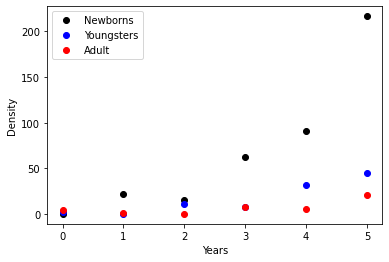

In [8]:
def z0(z):
    return(f0*z[0]+f1*z[1]+f2*z[2])

def z1(z):
    return(s0*z[0])

def z2(z):
    return(s1*z[1])

def simulation():
    Z = array([0,2,4]) #starting values of each ages
    years = 5 #time of the study
    figure('Simulation')
    xlabel('Years')
    ylabel('Density')
    plot(0,Z[0] ,'o',color='black')
    plot(0,Z[1] ,'o',color='blue')
    plot(0,Z[2] ,'o',color='red')
    legend(['Newborns', 'Youngsters','Adult'])
    print('Year 0:\n[·]Newborns:',Z[0],'\n[·]Youngsters:',Z[1],'\n[·]Adult:',Z[2])
    for i in range(years):
        Z0 = z0(Z)
        Z1 = z1(Z)
        Z2 = z2(Z)
        print('\nYear ',i+1,':\n[·]Newborns:',Z0,'\n[·]Youngsters:',Z1,'\n[·]Adult:',Z2)
        plot(i+1,Z0 ,'o',color='black')
        plot(i+1,Z1 ,'o',color='blue')
        plot(i+1,Z2 ,'o',color='red')
        Z = array([Z0,Z1,Z2])
    return(print('\n#Note: Using Exercise 6.2, lets check if the estimate we have is close to the results of the year',years,':\n[·]Newborns',Z0,'vs Newborns estimation',sum(Z)*newbornsRates,'\n[·]Youngsters',Z1,'vs Youngsters estimation',sum(Z)*youngstersRates,'\n[·]Adult',Z2,'vs Adult estimation',sum(Z)*adultRates,))

simulation()

